In [3]:
import pandas as pd
import numpy as np

In [4]:
# Chargement du dataset d'entraînement
df_train = pd.read_csv("../data/train.csv")

# Afficher les premières lignes pour vérifier
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
# Ajouter Time_Index au début du DataFrame
df_train.insert(0, "Time_Index", df_train.index)
df_train.head()

,Time_Index,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
# Vérifier les colonnes du DataFrame
df_train.columns

Index(['Time_Index', 'date', 'Temperature', 'Humidity', 'Light', 'CO2',
       'HumidityRatio', 'Occupancy'],
      dtype='object')

In [7]:
# Afficher des infos sur le dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time_Index     8143 non-null   int64  
 1   date           8143 non-null   object 
 2   Temperature    8143 non-null   float64
 3   Humidity       8143 non-null   float64
 4   Light          8143 non-null   float64
 5   CO2            8143 non-null   float64
 6   HumidityRatio  8143 non-null   float64
 7   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 572.6+ KB


In [8]:
df_train.describe()


,Time_Index,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,4072.000000,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,2350.825954,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,1.000000,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,2036.500000,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,4072.000000,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,6107.500000,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,8143.000000,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [9]:
# Supprimer la colonne "date" (non pertinente pour l'analyse)
df_train = df_train.drop(columns=["date"])
df_train.head()

,Time_Index,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,1,23.18,27.2720,426.0,721.25,0.004793,1
2,2,23.15,27.2675,429.5,714.00,0.004783,1
3,3,23.15,27.2450,426.0,713.50,0.004779,1
4,4,23.15,27.2000,426.0,708.25,0.004772,1
5,5,23.10,27.2000,426.0,704.50,0.004757,1


In [10]:
# X = features
X_train_raw = df_train.drop(columns=["Occupancy"])

# y = label
y_train = df_train["Occupancy"]

In [11]:
# Noramalisation des features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)

In [12]:
# Diviser le dataset en ensembles d'entraînement et de validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)


In [ ]:
# ==========================================================
# Entraînement du premier modèle de base : Decision Tree
# ==========================================================

# Import du classifieur et des métriques d'évaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [13]:
# Création du modèle Decision Tree (arbre de décision)
dt_model = DecisionTreeClassifier(random_state=42) # permet de reproduire les mêmes résultats

# Entraînement du modèle sur l'ensemble d'entraînement
dt_model.fit(X_train, y_train_final)

print("✔️ Decision Tree entraîné avec succès")

✔️ Decision Tree entraîné avec succès


In [14]:
# ---------------------------------------------
# Prédiction sur l'ensemble de validation
# Permet d'évaluer la performance du modèle
# ---------------------------------------------
y_pred_dt = dt_model.predict(X_val)

In [15]:
# ---------------------------------------------
# Calcul des métriques demandées dans le sujet :
# - Accuracy
# - Précision
# - Rappel
# - F1-score
# ---------------------------------------------

dt_accuracy = accuracy_score(y_val, y_pred_dt)
dt_precision = precision_score(y_val, y_pred_dt)
dt_recall = recall_score(y_val, y_pred_dt)
dt_f1 = f1_score(y_val, y_pred_dt)

print("=== Performance Decision Tree ===")
print("Accuracy :", dt_accuracy)
print("Précision :", dt_precision)
print("Rappel :", dt_recall)
print("F1-score :", dt_f1)

=== Performance Decision Tree ===
Accuracy : 0.9957028852056476
Précision : 0.9912280701754386
Rappel : 0.9883381924198251
F1-score : 0.9897810218978103


In [16]:
# Création d'un tableau de résultats réutilisable
results = {}
results["Decision Tree"] = {
    "accuracy": dt_accuracy,
    "precision": dt_precision,
    "recall": dt_recall,
    "f1_score": dt_f1
}

results

{'Decision Tree': {'accuracy': 0.9957028852056476,
  'precision': 0.9912280701754386,
  'recall': 0.9883381924198251,
  'f1_score': 0.9897810218978103}}

In [17]:
# ==========================================================
# Entraînement du deuxième modèle de base : Random Forest
# ==========================================================

from sklearn.ensemble import RandomForestClassifier

In [18]:
# ---------------------------------------------
# Création du modèle Random Forest
# n_estimators = 100 -> nombre d'arbres dans la forêt
# random_state = 42 -> pour des résultats reproductibles
# ---------------------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
rf_model.fit(X_train, y_train_final)

print("✔️ Random Forest entraîné avec succès")

✔️ Random Forest entraîné avec succès


In [19]:
# Prédiction sur les données de validation
y_pred_rf = rf_model.predict(X_val)

In [20]:
# Calcul des métriques du modèle Random Forest

rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_precision = precision_score(y_val, y_pred_rf)
rf_recall = recall_score(y_val, y_pred_rf)
rf_f1 = f1_score(y_val, y_pred_rf)

print("=== Performance Random Forest ===")
print("Accuracy :", rf_accuracy)
print("Précision :", rf_precision)
print("Rappel :", rf_recall)
print("F1-score :", rf_f1)


=== Performance Random Forest ===
Accuracy : 0.998158379373849
Précision : 0.9941860465116279
Rappel : 0.9970845481049563
F1-score : 0.9956331877729258


In [21]:
# Ajout des performances du Random Forest au tableau global

results["Random Forest"] = {
    "accuracy": rf_accuracy,
    "precision": rf_precision,
    "recall": rf_recall,
    "f1_score": rf_f1
}

results

{'Decision Tree': {'accuracy': 0.9957028852056476,
  'precision': 0.9912280701754386,
  'recall': 0.9883381924198251,
  'f1_score': 0.9897810218978103},
 'Random Forest': {'accuracy': 0.998158379373849,
  'precision': 0.9941860465116279,
  'recall': 0.9970845481049563,
  'f1_score': 0.9956331877729258}}

In [22]:
# ==========================================================
# Entraînement du troisième modèle de base : SVM
# ==========================================================

from sklearn.svm import SVC

In [23]:
# ---------------------------------------------
# Création du modèle SVM
# probability=True est essentiel pour obtenir des probabilités
# nécessaires à l'extraction des métafeatures
# ---------------------------------------------
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# ---------------------------------------------
# Entraînement du SVM sur les données d'entraînement
# ---------------------------------------------
svm_model.fit(X_train, y_train_final)

print("✔️ SVM entraîné avec succès")

✔️ SVM entraîné avec succès


In [24]:
# Prédiction du SVM sur le jeu de validation
y_pred_svm = svm_model.predict(X_val)

In [25]:
# Calcul des métriques du modèle SVM

svm_accuracy = accuracy_score(y_val, y_pred_svm)
svm_precision = precision_score(y_val, y_pred_svm)
svm_recall = recall_score(y_val, y_pred_svm)
svm_f1 = f1_score(y_val, y_pred_svm)

print("=== Performance SVM ===")
print("Accuracy :", svm_accuracy)
print("Précision :", svm_precision)
print("Rappel :", svm_recall)
print("F1-score :", svm_f1)

=== Performance SVM ===
Accuracy : 0.9883364027010436
Précision : 0.9475138121546961
Rappel : 1.0
F1-score : 0.9730496453900709


In [26]:
# Ajout des performances du SVM au tableau global

results["SVM"] = {
    "accuracy": svm_accuracy,
    "precision": svm_precision,
    "recall": svm_recall,
    "f1_score": svm_f1
}

results

{'Decision Tree': {'accuracy': 0.9957028852056476,
  'precision': 0.9912280701754386,
  'recall': 0.9883381924198251,
  'f1_score': 0.9897810218978103},
 'Random Forest': {'accuracy': 0.998158379373849,
  'precision': 0.9941860465116279,
  'recall': 0.9970845481049563,
  'f1_score': 0.9956331877729258},
 'SVM': {'accuracy': 0.9883364027010436,
  'precision': 0.9475138121546961,
  'recall': 1.0,
  'f1_score': 0.9730496453900709}}

In [27]:
# ==========================================================
# Entraînement du quatrième modèle de base : Naive Bayes
# ==========================================================

from sklearn.naive_bayes import GaussianNB

In [28]:
# Création du modèle Naive Bayes pour données continues
nb_model = GaussianNB()

# Entraînement du modèle sur l'ensemble d'entraînement
nb_model.fit(X_train, y_train_final)

print("✔️ Naive Bayes entraîné avec succès")

✔️ Naive Bayes entraîné avec succès


In [ ]:
# Prédiction du Naive Bayes sur le jeu de validation

y_pred_nb = nb_model.predict(X_val)

In [30]:
# Calcul des métriques du modèle Naive Bayes

nb_accuracy = accuracy_score(y_val, y_pred_nb)
nb_precision = precision_score(y_val, y_pred_nb)
nb_recall = recall_score(y_val, y_pred_nb)
nb_f1 = f1_score(y_val, y_pred_nb)

print("=== Performance Naive Bayes ===")
print("Accuracy :", nb_accuracy)
print("Précision :", nb_precision)
print("Rappel :", nb_recall)
print("F1-score :", nb_f1)

=== Performance Naive Bayes ===
Accuracy : 0.9797421731123389
Précision : 0.9211956521739131
Rappel : 0.9883381924198251
F1-score : 0.9535864978902954


In [31]:
# Ajout des performances du Naive Bayes au tableau global

results["Naive Bayes"] = {
    "accuracy": nb_accuracy,
    "precision": nb_precision,
    "recall": nb_recall,
    "f1_score": nb_f1
}

results

{'Decision Tree': {'accuracy': 0.9957028852056476,
  'precision': 0.9912280701754386,
  'recall': 0.9883381924198251,
  'f1_score': 0.9897810218978103},
 'Random Forest': {'accuracy': 0.998158379373849,
  'precision': 0.9941860465116279,
  'recall': 0.9970845481049563,
  'f1_score': 0.9956331877729258},
 'SVM': {'accuracy': 0.9883364027010436,
  'precision': 0.9475138121546961,
  'recall': 1.0,
  'f1_score': 0.9730496453900709},
 'Naive Bayes': {'accuracy': 0.9797421731123389,
  'precision': 0.9211956521739131,
  'recall': 0.9883381924198251,
  'f1_score': 0.9535864978902954}}

In [32]:
# ==========================================================
# Comparaison globale des quatre modèles de base
# ==========================================================

import pandas as pd

# Transformation du dictionnaire des résultats en DataFrame
results_df = pd.DataFrame(results).T

# Affichage du tableau final des performances
results_df

,accuracy,precision,recall,f1_score
Decision Tree,0.995703,0.991228,0.988338,0.989781
Random Forest,0.998158,0.994186,0.997085,0.995633
SVM,0.988336,0.947514,1.000000,0.973050
Naive Bayes,0.979742,0.921196,0.988338,0.953586


In [34]:
# ==========================================================
# Extraction des métafeatures pour chaque modèle
# ==========================================================

# DataFrame qui contiendra les 8 métafeatures
meta_features = pd.DataFrame()

# ---------------------------------------------
# Fonction utilitaire pour extraire :
# - Confiance maximale
# - Margin
# à partir de predict_proba()
# ---------------------------------------------
def extract_meta_features(model, X):
    """
    Retourne deux tableaux :
    - confiance_max : la probabilité maximale pour chaque ligne
    - margin : la différence absolue entre P(1) et P(0)
    """
    proba = model.predict_proba(X)  # proba[:,0] = P(0), proba[:,1] = P(1)
    
    # Confiance maximale
    confiance_max = np.max(proba, axis=1)
    
    # Margin = |P(1) - P(0)|
    margin = np.abs(proba[:, 1] - proba[:, 0])
    
    return confiance_max, margin

# ---------------------------------------------
# Extraire les métafeatures pour CHAQUE modèle
# ---------------------------------------------

# Decision Tree
dt_conf, dt_margin = extract_meta_features(dt_model, X_val)
meta_features["DT_confiance"] = dt_conf
meta_features["DT_margin"] = dt_margin

# Random Forest
rf_conf, rf_margin = extract_meta_features(rf_model, X_val)
meta_features["RF_confiance"] = rf_conf
meta_features["RF_margin"] = rf_margin

# SVM
svm_conf, svm_margin = extract_meta_features(svm_model, X_val)
meta_features["SVM_confiance"] = svm_conf
meta_features["SVM_margin"] = svm_margin

# Naive Bayes
nb_conf, nb_margin = extract_meta_features(nb_model, X_val)
meta_features["NB_confiance"] = nb_conf
meta_features["NB_margin"] = nb_margin

# Visualisation des premières lignes
meta_features.head()

,DT_confiance,DT_margin,RF_confiance,RF_margin,SVM_confiance,SVM_margin,NB_confiance,NB_margin
0,1.0,1.0,1.0,1.0,0.999576,0.999151,1.000000,1.000000
1,1.0,1.0,1.0,1.0,0.999597,0.999195,1.000000,1.000000
2,1.0,1.0,1.0,1.0,0.999813,0.999625,1.000000,1.000000
3,1.0,1.0,1.0,1.0,0.999977,0.999954,1.000000,1.000000
4,1.0,1.0,1.0,1.0,0.999213,0.998426,0.955967,0.911934


In [35]:
# ==========================================================
# Construction de la cible du meta-modèle (meta_y)
# ==========================================================

meta_y = []  # la liste qui va contenir le meilleur modèle pour chaque ligne

# ---------------------------------------------
# Rappel :
# dt_model, rf_model, svm_model, nb_model sont déjà entraînés
# dt_conf, rf_conf, svm_conf, nb_conf contiennent les confiances
# y_val contient les vraies valeurs
# ---------------------------------------------

for i in range(len(X_val)):
    
    # Liste des prédictions de tous les modèles pour la ligne i
    preds = {
        "DT": dt_model.predict([X_val[i]])[0],
        "RF": rf_model.predict([X_val[i]])[0],
        "SVM": svm_model.predict([X_val[i]])[0],
        "NB": nb_model.predict([X_val[i]])[0]
    }
    
    # Liste des confiances de chaque modèle pour la même ligne
    confs = {
        "DT": dt_conf[i],
        "RF": rf_conf[i],
        "SVM": svm_conf[i],
        "NB": nb_conf[i]
    }
    
    true_label = y_val.iloc[i]
    
    # On cherche les modèles corrects
    correct_models = [model for model, pred in preds.items() if pred == true_label]
    
    # ------------------------------
    # Si un ou plusieurs modèles sont corrects
    #    -> on choisit celui avec la meilleure confiance
    # ------------------------------
    if len(correct_models) > 0:
        best = max(correct_models, key=lambda m: confs[m])
    
    # ------------------------------
    # Si aucun n'est correct (fallback)
    #    -> on choisit le modèle le plus confiant
    # ------------------------------
    else:
        best = max(confs.keys(), key=lambda m: confs[m])
    
    # On ajoute le meilleur modèle pour cette ligne
    meta_y.append(best)

# Convertir en série pandas
meta_y = pd.Series(meta_y)

# Affichage des 10 premières lignes
meta_y.head()

0    DT
1    DT
2    DT
3    DT
4    DT
dtype: object

In [36]:
# ==========================================================
# Entraînement du meta-modèle KNN
# ==========================================================

from sklearn.neighbors import KNeighborsClassifier

# ---------------------------------------------
# Création du modèle KNN pour le meta-learning
# k = 5 selon les spécifications du sujet
# ---------------------------------------------
knn_meta = KNeighborsClassifier(n_neighbors=5)

# ---------------------------------------------
# Entraînement du KNN sur :
# - meta_features (les 8 métafeatures)
# - meta_y (le meilleur modèle pour chaque ligne)
# ---------------------------------------------
knn_meta.fit(meta_features, meta_y)

print("✔️ Meta-modèle KNN entraîné avec succès")

✔️ Meta-modèle KNN entraîné avec succès


In [37]:
# Vérification rapide
knn_meta.predict(meta_features[:5])

array(['DT', 'DT', 'DT', 'DT', 'DT'], dtype=object)

=== Accuracy du meta-modèle KNN ===
0.9969306322897483

=== Matrice de confusion (texte) ===
[[1623    1    0]
 [   3    1    0]
 [   0    1    0]]

=== Rapport de classification du meta-modèle ===
              precision    recall  f1-score   support

          DT       1.00      1.00      1.00      1624
          NB       0.33      0.25      0.29         4
          RF       0.00      0.00      0.00         1

    accuracy                           1.00      1629
   macro avg       0.44      0.42      0.43      1629
weighted avg       1.00      1.00      1.00      1629



c:\Users\ldiop\anaconda3\envs\meta_learning\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ldiop\anaconda3\envs\meta_learning\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ldiop\anaconda3\envs\meta_learning\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

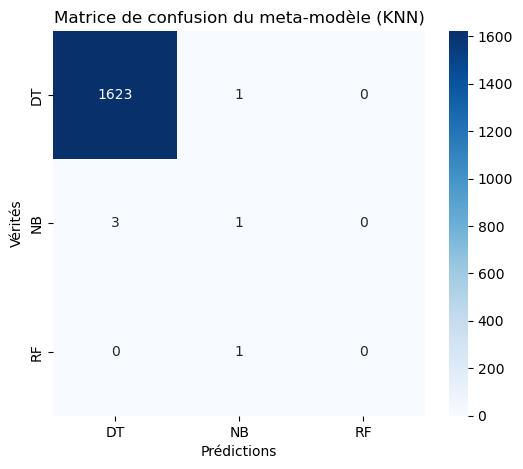

In [41]:
# ==========================================================
# Évaluation du meta-modèle KNN
# ==========================================================

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Prédiction du meta-modèle sur les métafeatures
meta_pred = knn_meta.predict(meta_features)

# Accuracy du meta-modèle
meta_accuracy = accuracy_score(meta_y, meta_pred)
print("=== Accuracy du meta-modèle KNN ===")
print(meta_accuracy)

# Matrice de confusion (affichage texte)
cm = confusion_matrix(meta_y, meta_pred)

print("\n=== Matrice de confusion (texte) ===")
print(cm)

#  Rapport de classification
print("\n=== Rapport de classification du meta-modèle ===")
print(classification_report(meta_y, meta_pred))

# Matrice de confusion (affichage visuel)
labels = sorted(meta_y.unique())   # classes présentes (DT, RF, SVM, NB)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("Matrice de confusion du meta-modèle (KNN)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()
